# Brasilian ECommerce Dataset by Olist

This is a Brazilian ecommerce public dataset of orders made at Olist Store. The dataset has information of 100k orders from 2016 to 2018 made at multiple marketplaces in Brazil. Its features allows viewing an order from multiple dimensions: from order status, price, payment and freight performance to customer location, product attributes and finally reviews written by customers.

## Choosing a domain

The domain is e-commerce


## Describing our hypotheses and data sets


The dataset is composed of 6 tables (csv files): customers dataset, order items dataset, order payments dataset, orders dataset, products dataset, and product category names. They include different types of data, such as time series data, geographical data, and derived data. Our hypothesis is related to customer segmentation: analyse customer demographics, such as city, to segment the customer database to identify top performing cities. This analysis can improve customer targeting.

In [1]:
import pandas as pd, numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

customers = pd.read_csv('data/olist_customers_dataset.csv')
items = pd.read_csv('data/olist_order_items_dataset.csv')
payments = pd.read_csv('data/olist_order_payments_dataset.csv')
orders = pd.read_csv('data/olist_orders_dataset.csv')
products = pd.read_csv('data/olist_products_dataset.csv')
names = pd.read_csv('data/product_category_name_translation.csv')

In [2]:
customers[['customer_id', 'customer_zip_code_prefix', 'customer_city', 'customer_state']].shape

(99441, 4)

In [3]:
items[['order_id', 'product_id', 'price']].shape

(112650, 3)

In [4]:
payments[['order_id', 'payment_type']].shape

(103886, 2)

In [5]:
orders[['order_id','customer_id','order_purchase_timestamp']].shape

(99441, 3)

In [6]:
products[['product_id', 'product_category_name']].shape

(32951, 2)

In [7]:
names.shape

(71, 2)

## Joining the datasets

In [8]:
product_names = pd.DataFrame()
product_names = pd.merge(products[['product_id', 'product_category_name']],names, on="product_category_name")
items_and_names = pd.DataFrame()
items_and_names = pd.merge(items[['order_id', 'product_id', 'price']],product_names[['product_id', 'product_category_name_english']], on="product_id")
items_names_payments = pd.DataFrame()
items_names_payments = pd.merge(items_and_names,payments[['order_id', 'payment_type']], on="order_id")
items_names_payments_orders = pd.DataFrame()
items_names_payments_orders = pd.merge(items_names_payments,orders[['order_id','customer_id','order_purchase_timestamp']], on="order_id")
all = pd.DataFrame()
all = pd.merge(items_names_payments_orders,customers[['customer_id', 'customer_zip_code_prefix', 'customer_city', 'customer_state']], on="customer_id")
all.head()

,order_id,product_id,price,product_category_name_english,payment_type,customer_id,order_purchase_timestamp,customer_zip_code_prefix,customer_city,customer_state
0,00010242fe8c5a6d1ba2dd792cb16214,4244733e06e7ecb4970a6e2683c13e61,58.9,cool_stuff,credit_card,3ce436f183e68e07877b285a838db11a,2017-09-13 08:59:02,28013,campos dos goytacazes,RJ
1,130898c0987d1801452a8ed92a670612,4244733e06e7ecb4970a6e2683c13e61,55.9,cool_stuff,boleto,e6eecc5a77de221464d1c4eaff0a9b64,2017-06-28 11:52:20,75800,jatai,GO
2,532ed5e14e24ae1f0d735b91524b98b9,4244733e06e7ecb4970a6e2683c13e61,64.9,cool_stuff,credit_card,4ef55bf80f711b372afebcb7c715344a,2018-05-18 10:25:53,30720,belo horizonte,MG
3,6f8c31653edb8c83e1a739408b5ff750,4244733e06e7ecb4970a6e2683c13e61,58.9,cool_stuff,credit_card,30407a72ad8b3f4df4d15369126b20c9,2017-08-01 18:38:42,83070,sao jose dos pinhais,PR
4,7d19f4ef4d04461989632411b7e588b9,4244733e06e7ecb4970a6e2683c13e61,58.9,cool_stuff,credit_card,91a792fef70ecd8cc69d3c7feb3d12da,2017-08-10 21:48:40,36400,conselheiro lafaiete,MG


## Cleaning and preparing the data

## Removing duplicates

In [9]:
all.shape

(115878, 10)

In [10]:
len(all['order_id'].unique())

97255

In [11]:
all = all.drop_duplicates(subset='order_id',keep='first')
all.shape

(97255, 10)

In [12]:
type(all['order_purchase_timestamp'][1])
all['order_purchase_timestamp']= pd.to_datetime(all['order_purchase_timestamp'])

## Exporting to csv

In [13]:
all.to_excel('merged.xlsx', sheet_name='Sheet1')
all.to_csv('merged.csv')
all.describe()

,price,order_purchase_timestamp,customer_zip_code_prefix
count,97255.000000,97255,97255.000000
mean,125.983444,2018-01-01 15:25:30.421068288,35146.411999
min,0.850000,2016-09-04 21:15:19,1003.000000
25%,41.900000,2017-09-13 16:38:40.500000,11380.000000
50%,79.000000,2018-01-20 20:57:48,24425.000000
75%,139.900000,2018-05-05 21:46:09,58862.500000
max,6735.000000,2018-09-03 09:06:57,99980.000000
std,190.927477,NaN,29787.788224


In [14]:
df = pd.read_excel('merged.xlsx', sheet_name='Sheet1')  # Replace 'merged.xlsx' with the actual file path and sheet name

duplicate_rows = df[df.duplicated()]

if not duplicate_rows.empty:
    print("Duplicate rows:")
    print(duplicate_rows)
else:
    print("No duplicate rows found.")

No duplicate rows found.


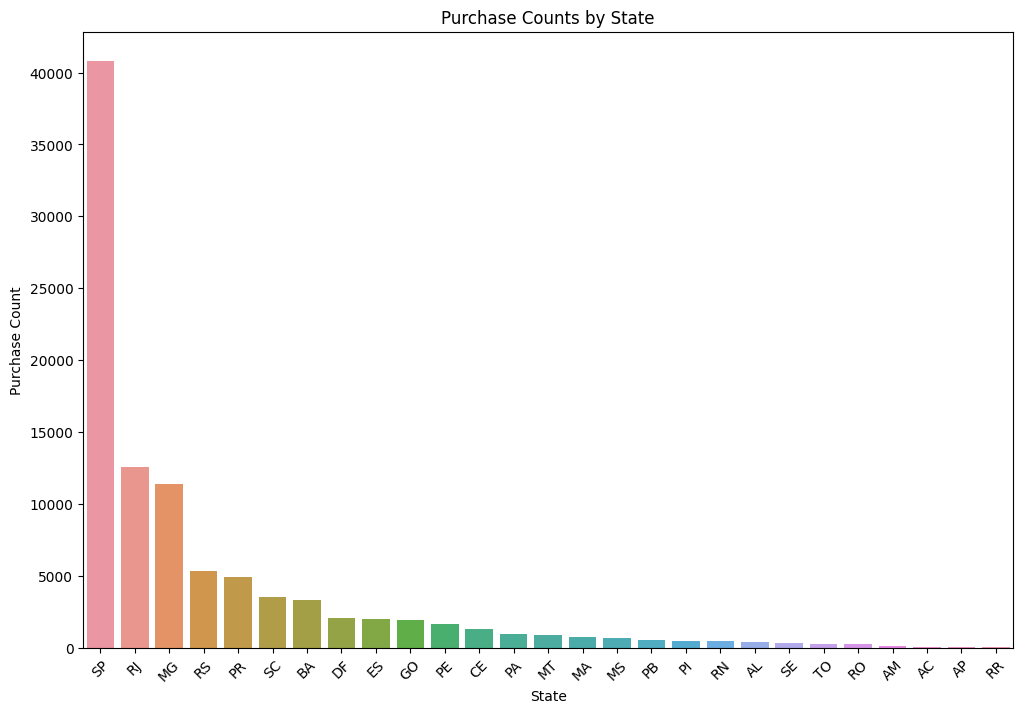

In [15]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

df = pd.read_excel('merged.xlsx', sheet_name='Sheet1')

plt.figure(figsize=(12, 8))
sns.countplot(x='customer_state', data=df, order=df['customer_state'].value_counts().index)
plt.xlabel('State')
plt.ylabel('Purchase Count')
plt.title('Purchase Counts by State')
plt.xticks(rotation=45)
plt.show()



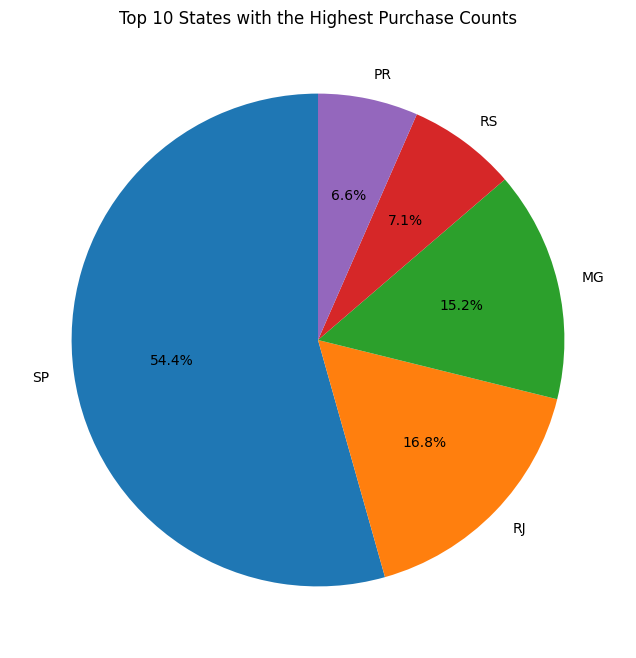

In [16]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

df = pd.read_excel('merged.xlsx', sheet_name='Sheet1')
state_counts = df['customer_state'].value_counts().head(5)

plt.figure(figsize=(8, 8))
plt.pie(state_counts, labels=state_counts.index, autopct='%1.1f%%', startangle=90)
plt.title('Top 10 States with the Highest Purchase Counts')
plt.show()


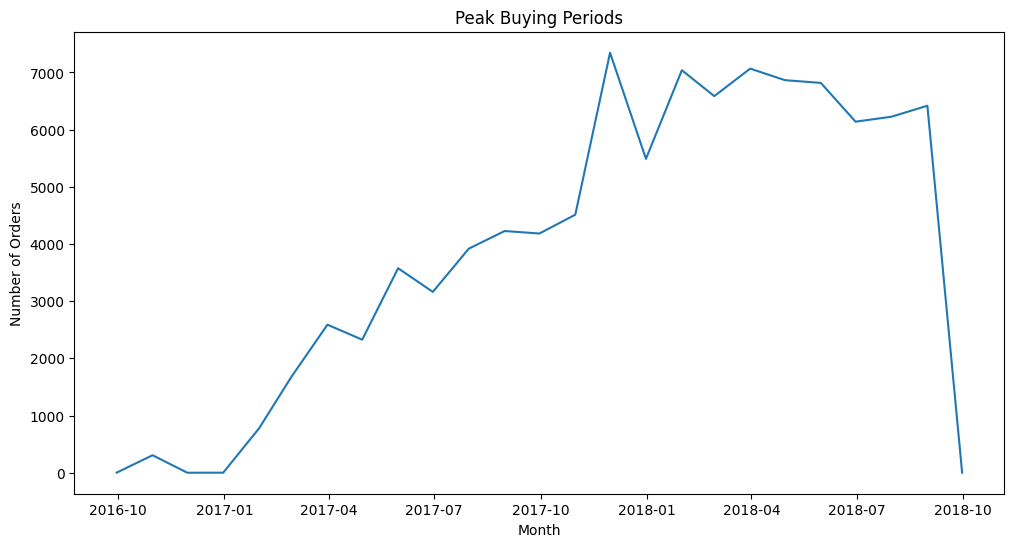

In [17]:
import pandas as pd
import matplotlib.pyplot as plt

df = pd.read_excel('merged.xlsx', sheet_name='Sheet1')
df['order_purchase_timestamp'] = pd.to_datetime(df['order_purchase_timestamp'])
df.set_index('order_purchase_timestamp', inplace=True)

monthly_orders = df.resample('M').size()

plt.figure(figsize=(12, 6))
plt.plot(monthly_orders)
plt.xlabel('Month')
plt.ylabel('Number of Orders')
plt.title('Peak Buying Periods')
plt.show()

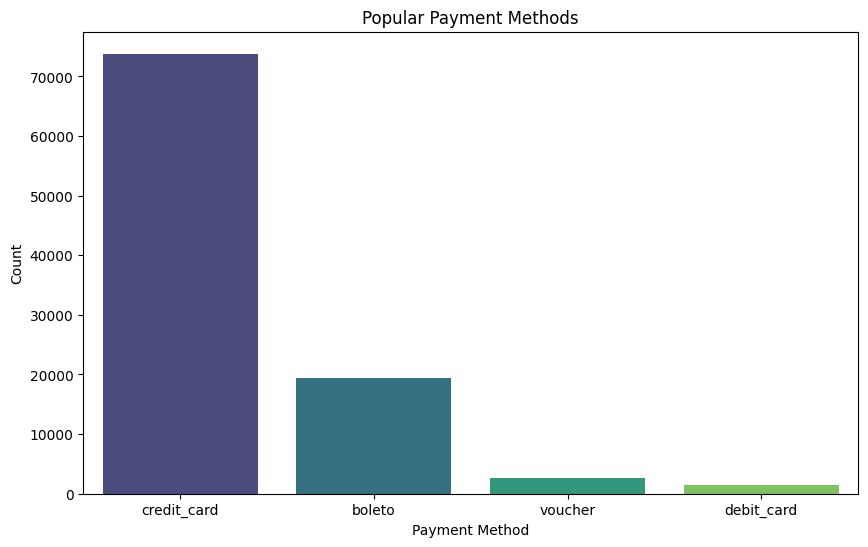

In [18]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

df = pd.read_excel('merged.xlsx', sheet_name='Sheet1')
popular_payment_methods = df['payment_type'].value_counts()

plt.figure(figsize=(10, 6))
sns.barplot(y=popular_payment_methods.values, x=popular_payment_methods.index, palette='viridis')
plt.xlabel('Payment Method')
plt.ylabel('Count')
plt.title('Popular Payment Methods')
plt.show()


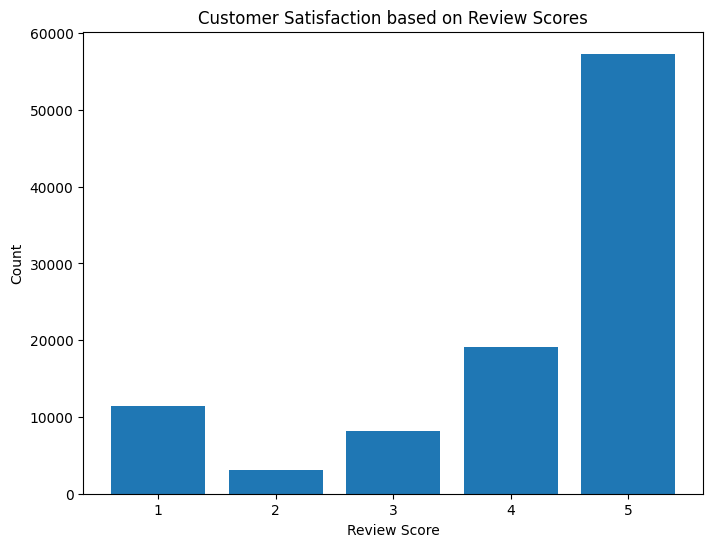

In [19]:
import pandas as pd
import matplotlib.pyplot as plt

df = pd.read_csv('data/olist_order_reviews_dataset.csv')

df_filtered = df.dropna(subset=['review_score'])

review_score_counts = df_filtered['review_score'].value_counts().sort_index()

plt.figure(figsize=(8, 6))
plt.bar(review_score_counts.index, review_score_counts.values)
plt.xlabel('Review Score')
plt.ylabel('Count')
plt.title('Customer Satisfaction based on Review Scores')
plt.show()


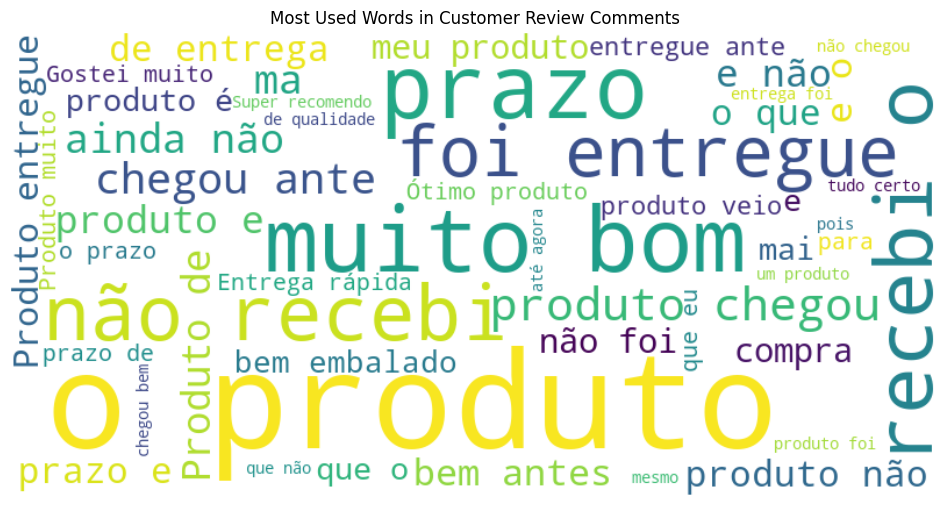

In [22]:
import pandas as pd
import matplotlib.pyplot as plt
from wordcloud import WordCloud

df = pd.read_csv('data/olist_order_reviews_dataset.csv')
df_filtered = df.dropna(subset=['review_score', 'review_comment_message'])

all_comments = ' '.join(df_filtered['review_comment_message'].tolist())

wordcloud = WordCloud(width=800, height=400, max_words=50, background_color='white').generate(all_comments)

plt.figure(figsize=(12, 8))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title('Most Used Words in Customer Review Comments')
plt.show()